# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Carlos Cherto </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [23]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [24]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [25]:
df['Hemisfério'] = df['Latitude'].mask(df['Latitude']> 0, 'Norte').mask(df['Latitude'] < 0, 'Sul')
df.Hemisfério

0        Norte
1        Norte
2          Sul
3          Sul
4        Norte
5          Sul
6        Norte
7          Sul
8          Sul
9          Sul
10         Sul
11         Sul
12       Norte
13         Sul
14       Norte
15         Sul
16       Norte
17       Norte
18       Norte
19       Norte
20       Norte
21       Norte
22       Norte
23       Norte
24       Norte
25       Norte
26       Norte
27       Norte
28       Norte
29       Norte
         ...  
23382      Sul
23383    Norte
23384    Norte
23385    Norte
23386      Sul
23387      Sul
23388      Sul
23389      Sul
23390      Sul
23391      Sul
23392    Norte
23393      Sul
23394      Sul
23395      Sul
23396    Norte
23397      Sul
23398      Sul
23399      Sul
23400    Norte
23401      Sul
23402      Sul
23403      Sul
23404      Sul
23405    Norte
23406    Norte
23407    Norte
23408    Norte
23409    Norte
23410      Sul
23411    Norte
Name: Hemisfério, Length: 23412, dtype: object

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

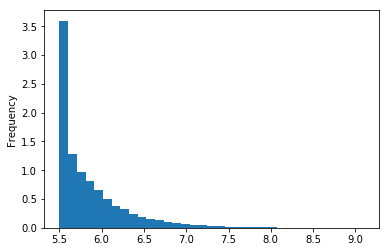

In [26]:
df.Magnitude.plot(kind='hist', bins = 35, normed=1)
#Olhando o histograma, fica notável a sua semelhança com uma função exponencial,
#em que, quanto maior a magnitude menor será a frequência. 

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [27]:
expon.fit(df["Magnitude"])
#segundo http://www.itl.nist.gov/div898/handbook/eda/section3/eda3667.htm, a
#distribuição exponencial é dada por f(x)=(1/b)*e**-((x-u)/b), onde u é o loc e b 
#o scale.

(5.4999999996710809, 0.38254864885090978)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

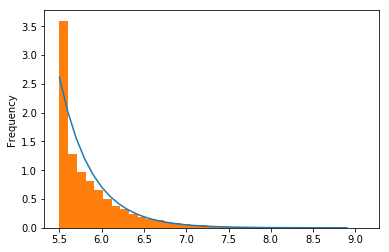

In [28]:
plt.plot(np.arange(5.5,9,0.1),expon.pdf(np.arange(5.5,9,0.1),loc = (expon.fit(df["Magnitude"])[0]),scale = (expon.fit(df["Magnitude"])[1])))
df.Magnitude.plot(kind='hist', bins = 35, normed=1)
#Vemos que a fdp plotada evidencia que quanto maior a magnitude, menor a frequencia
#relativa do evento 

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

In [56]:
ct = pd.crosstab(df.Hemisfério,df.Type, normalize = True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
0.0,0.000043,0.000000,0.000000,0.000000
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545148,0.000085,0.001196,0.000043


Adicione na célula abaixo o cálculo:

In [ ]:
#Pela tabela, vemos que a probabilidade de um terremoto ocorrer no hemisfério Norte é de 0.447121

Explique o seu raciocínio

In [ ]:
#A probabilidade de um evento pode ser aproximada pelo número de vezes que ele
#ocorreu sobre o número de experimentos total.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [ ]:
#P(nu|norte)=P(nu e norte)/P(norte)=0.006279/0.4534=0.01382

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

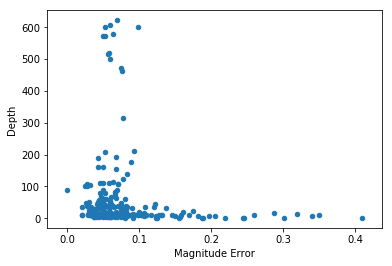

In [42]:
pd.DataFrame({
    "Magnitude Error": df['Magnitude Error'],
    "Depth": df['Depth']}).plot.scatter('Magnitude Error', 'Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [40]:
pd.DataFrame({
    "Magnitude Error": df['Magnitude Error'],
    "Depth": df['Depth']
}).corr(method='pearson')

,Depth,Magnitude Error
Depth,1.000000,-0.076918
Magnitude Error,-0.076918,1.000000


Explique o que significa o valor da correlação calculada acima? 

In [ ]:
#A correlação descreve o quão próximo de uma reta os pontos do gráfico acima estã.
#Como o resultado obtido foi próximo de zero, e como podemos ver pelo gráfico, a correlação
#linear entre os pontos não é alta.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

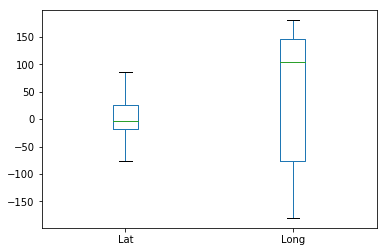

In [44]:
df_box = pd.DataFrame({
    "Lat": df.Latitude,
    "Long": df.Longitude})
df_box.plot(kind = "box")

In [47]:
df['Latitude'].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [48]:
df['Longitude'].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [67]:
mb=df[df['Magnitude Type'].isin(['MB'])]
mb=df[df['Type'].isin(['Nuclear Explosion'])]
mb.Hemisfério.value_counts()

Norte    147
Sul       28
Name: Hemisfério, dtype: int64

In [68]:
#Pelos dados que obtemos, vemos que quando os abalos foram de magnitude Type MB
#e de Type Nuclear Explosion, eles eram, na grande maioria das vezes, no hemisfério
#Norte. Assim, sabemos que a probabilidade de ser no Norte é maior. Podemos também
#calcular P(norte) e P(sul):
pnorte=147/165
psul=28/165